<a href="https://colab.research.google.com/github/ajaymathew522/Stock-Market-Analysis-/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from fastai.tabular import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NSE-TATAGLOBAL11.csv to NSE-TATAGLOBAL11.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['NSE-TATAGLOBAL11.csv']))

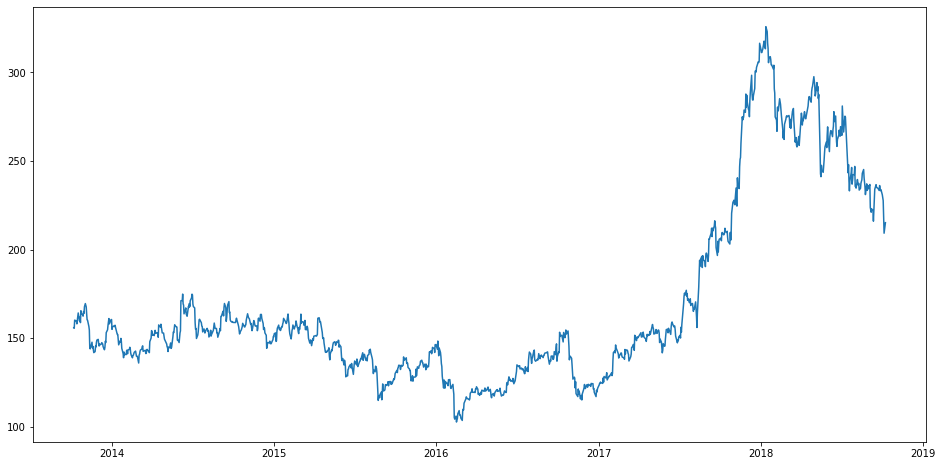

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [ ]:
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
 - 167s - loss: 0.0011
Epoch 2/10
 - 169s - loss: 4.7557e-04
Epoch 3/10
 - 167s - loss: 2.9884e-04
Epoch 4/10
 - 167s - loss: 2.8687e-04
Epoch 5/10
 - 167s - loss: 2.9795e-04
Epoch 6/10
 - 167s - loss: 2.5110e-04
Epoch 7/10
 - 164s - loss: 2.3776e-04
Epoch 8/10
 - 161s - loss: 2.3227e-04
Epoch 9/10
 - 159s - loss: 2.2774e-04
Epoch 10/10
 - 159s - loss: 2.3982e-04


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

8.550603338539414

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


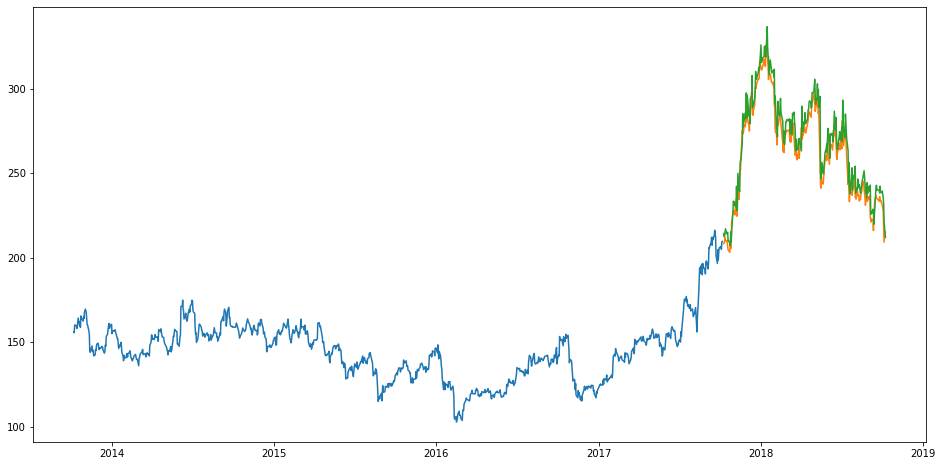

In [ ]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
print(valid[['Close','Predictions']])

             Close  Predictions
Date                           
2017-10-09   208.3   214.292236
2017-10-10  208.45   212.497849
2017-10-11   209.4   212.872025
2017-10-12     212   214.057327
2017-10-13  210.25   217.084259
...            ...          ...
2018-10-01   230.9   239.368073
2018-10-03   227.6   235.598221
2018-10-04   218.2   232.123199
2018-10-05   209.2   221.121658
2018-10-08  215.15   212.060822

[248 rows x 2 columns]
